In [1]:
path_to_muograph = "../"
import sys
sys.path.insert(1, path_to_muograph)

![alternative text](../images/muograph_logo.png)


**<h1><center>Volume of Interest tutorial</center></h1>**

The `Volume` class is used to store and compute attributes of the **passive volume** to be imaged. For the sake of image reconstruction, the volume of interest (VOI) has to be **voxelized**. The `Volume` class computes the position of each voxel.

**SUMMARY**

*Initialization*:

- Initializes the volume's center (position), dimensions (dimension), and the voxel width (voxel_width).
- Computes the minimum (xyz_min) and maximum (xyz_max) coordinates of the volume.

*Voxel Generation*:

- Calculates the number of voxels along each axis. It ensures that the volume dimensions are divisible by the voxel width.

- Generates voxels.

- Provides the center coordinates of all voxels in the volume.

- Provides the edges (corners) of all voxels.


It takes as input:

 - `position:Tuple[float,float, float]`, the position of the center of the VOI along x,y,z in mm.

 - `dimension:Tuple[float, float, float]`, the span of the VOI along x,y,z.

 - `voxel_width:float`, the voxel size in mm. Has to be chosen such that the number of voxels along all direction is an integer.

In [2]:
from muograph.volume.volume import Volume
voi = Volume(
    position = (0, 0, -1200),
    dimension = (1000, 600, 600),
    voxel_width = 20)

GPU is not available. Using CPU


In [3]:
voi

Volume of interest at x,y,z = 0.00,0.00,-1200.00, voxel size = 20.00 mm

When instanciated, the following attributes are computed:

 - `voxel_edges:torch.tensor`, with size (Nx, Ny ,Nz , 2, 3) where Ni is the number of voxels along the i direction. It stores the $x, y, z$ position of the lower left and upper right corner of every voxel. 

In [4]:
ix,iy,iz = 10,4,3

f"Voxel {ix},{iy},{iz} bottom upper right = {voi.voxel_edges[ix,iy,iz,1,:]} mm"

'Voxel 10,4,3 bottom upper right = tensor([ -280.,  -200., -1420.]) mm'

In [5]:
f"Voxel {ix},{iy},{iz} bottom left corner = {voi.voxel_edges[ix,iy,iz,0,:]} mm"

'Voxel 10,4,3 bottom left corner = tensor([ -300.,  -220., -1440.]) mm'

 - `voxel_centers:torch.tensor`, with size (Nx,Ny,Nz,3) where Ni is the number of voxels along the i direction. It stores the xyz position of center of each voxel. 

In [6]:
f"Voxel {ix},{iy},{iz} center = {voi.voxel_centers[ix,iy,iz,:]} mm"

'Voxel 10,4,3 center = tensor([ -290.,  -210., -1430.]) mm'

 - `n_vox_xyz:np.ndarray` with size (3), the number of voxels along x,y,z directions

In [7]:
f"# of voxels along x,y,z direction = {voi.n_vox_xyz}"

'# of voxels along x,y,z direction = (50, 30, 30)'

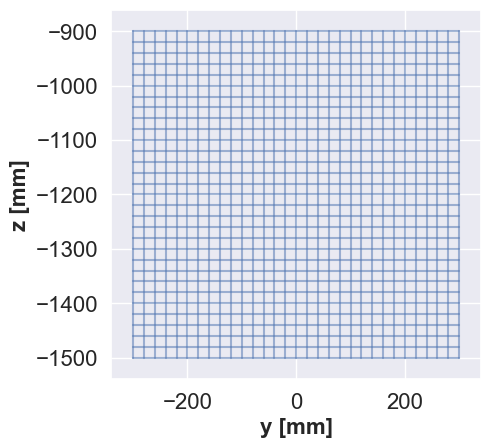

In [12]:
from muograph.plotting.voxel import VoxelPlotting

VoxelPlotting.plot_voxel_grid(
    dim=0, # The direction to project along (0 = x, 1 = y, 2 = z)
    voi=voi, # The volume
)

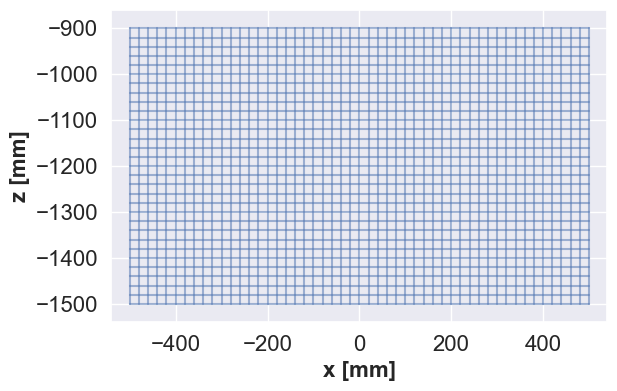

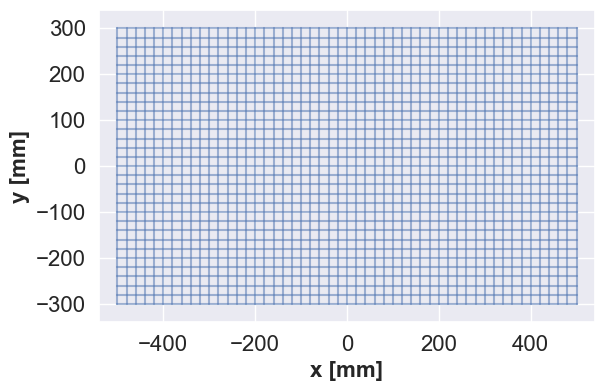

In [11]:
VoxelPlotting.plot_voxel_grid(dim=1,voi=voi)
VoxelPlotting.plot_voxel_grid(dim=2,voi=voi)